In [18]:
import requests # request img from web
import shutil # save img locally
import time
import os 
import numpy as np
from tensorflow.keras.models import load_model
from keras.preprocessing import image
import requests
import json
import matplotlib.pyplot as plt

In [19]:
from tensorflow.keras.models import load_model
classifier = load_model('densenet121.hdf5')

In [20]:
def predict(image_path):
    from skimage import io
    from keras.preprocessing import image
    #path='imbalanced/Scratch/Scratch_400.jpg'
    import tensorflow as tf

    img = tf.keras.utils.load_img(image_path, grayscale=False, target_size=(100, 100))
    show_img=tf.keras.utils.load_img(image_path, grayscale=False, target_size=(100, 100))
    disease_class = ['Tomato___diseased','Tomato___healthy']
    
    x = tf.keras.utils.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    #x = np.array(x, 'float32')
    x /= 255

    custom = classifier.predict(x)
    print(custom[0])



    #x = x.reshape([64, 64]);

    #plt.gray()
    plt.imshow(show_img)
    plt.show()

    a=custom[0]
    ind=np.argmax(a)

    print('Prediction:',disease_class[ind])
    return disease_class[ind]


In [21]:
def download():
    url = 'http://192.168.197.153/capture'
    file_name = '1.png'

    res = requests.get(url, stream = True)

    if res.status_code == 200:
        with open(file_name,'wb') as f:
            shutil.copyfileobj(res.raw, f)
        print('Image sucessfully Downloaded: ',file_name)
    else:
        print('Image Couldn\'t be retrieved')

In [22]:
download()

Image sucessfully Downloaded:  1.png


Image sucessfully Downloaded:  1.png
1/1 [==============================] - 6s 6s/step
[0.9048562 0.0951438]


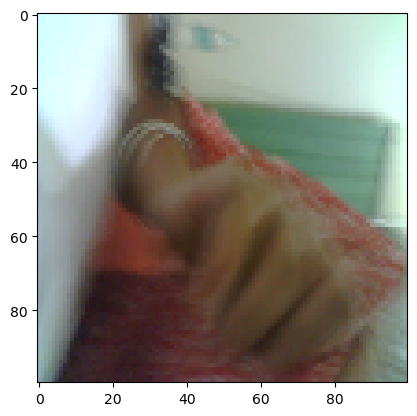

Prediction: Tomato___diseased
Image sucessfully Downloaded:  1.png
1/1 [==============================] - 0s 226ms/step
[0.9530378  0.04696224]


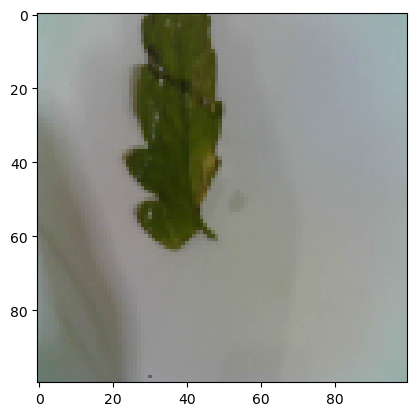

Prediction: Tomato___diseased
Image sucessfully Downloaded:  1.png
1/1 [==============================] - 0s 463ms/step
[0.9231527  0.07684731]


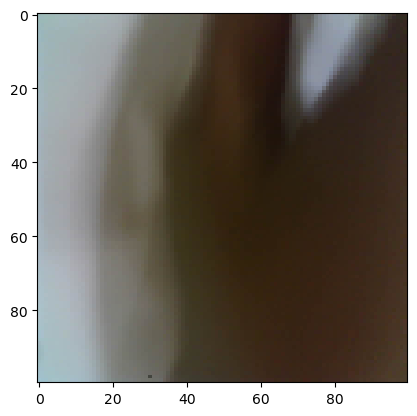

Prediction: Tomato___diseased
Image sucessfully Downloaded:  1.png
1/1 [==============================] - 0s 214ms/step
[0.36938888 0.6306112 ]


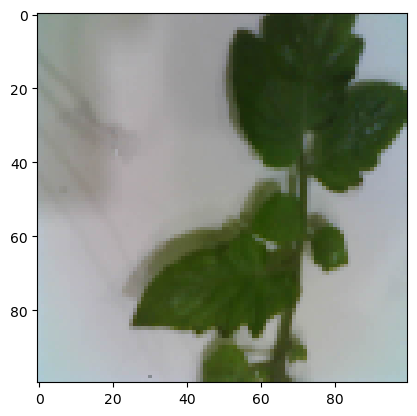

Prediction: Tomato___healthy
Image sucessfully Downloaded:  1.png
1/1 [==============================] - 0s 190ms/step
[0.45362252 0.5463775 ]


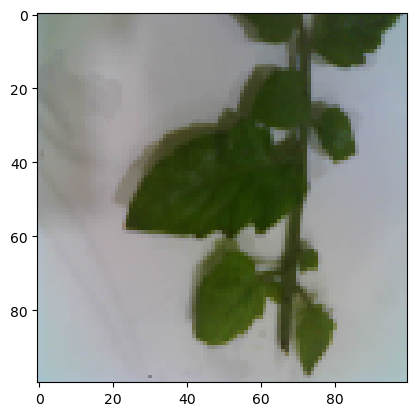

Prediction: Tomato___healthy
Image sucessfully Downloaded:  1.png
1/1 [==============================] - 0s 185ms/step
[0.8968489  0.10315114]


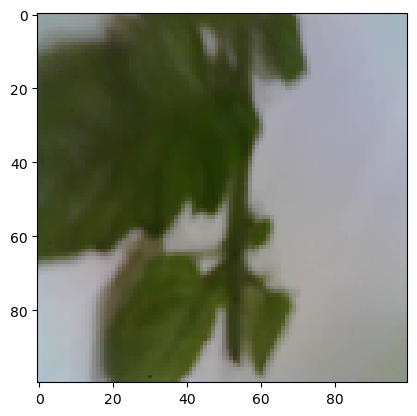

Prediction: Tomato___diseased
Image sucessfully Downloaded:  1.png
1/1 [==============================] - 0s 201ms/step
[0.89071286 0.10928714]


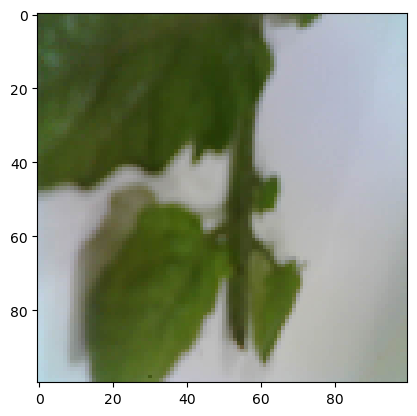

Prediction: Tomato___diseased
Image sucessfully Downloaded:  1.png
1/1 [==============================] - 0s 190ms/step
[0.9870279  0.01297206]


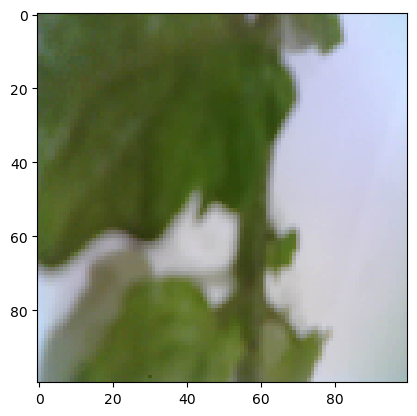

Prediction: Tomato___diseased
Image sucessfully Downloaded:  1.png
1/1 [==============================] - 0s 158ms/step
[0.9980111  0.00198889]


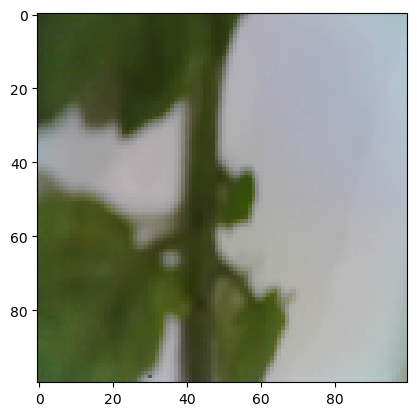

Prediction: Tomato___diseased
Image sucessfully Downloaded:  1.png
1/1 [==============================] - 0s 212ms/step
[0.9901939  0.00980614]


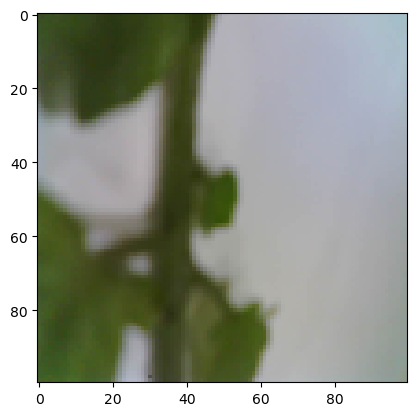

Prediction: Tomato___diseased
Image sucessfully Downloaded:  1.png
1/1 [==============================] - 0s 161ms/step
[0.99339265 0.00660736]


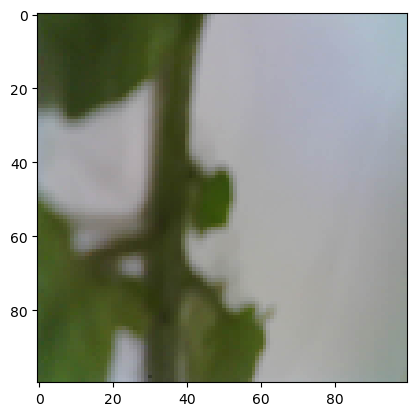

Prediction: Tomato___diseased
Image sucessfully Downloaded:  1.png
1/1 [==============================] - 0s 152ms/step
[0.99537957 0.00462045]


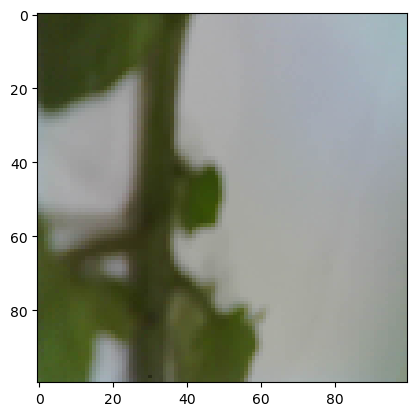

Prediction: Tomato___diseased
Image sucessfully Downloaded:  1.png
1/1 [==============================] - 0s 186ms/step
[0.9462307  0.05376923]


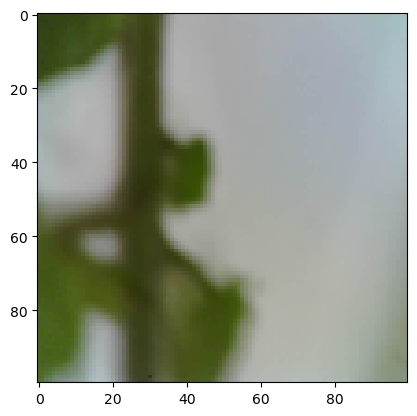

Prediction: Tomato___diseased
Image sucessfully Downloaded:  1.png
1/1 [==============================] - 0s 163ms/step
[0.6975259  0.30247405]


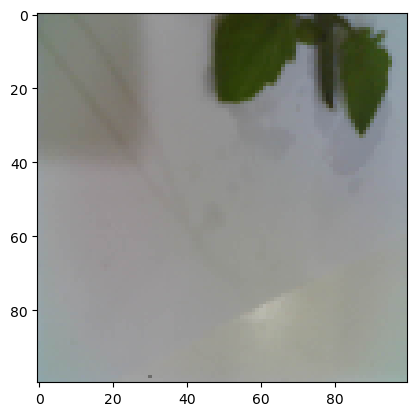

Prediction: Tomato___diseased
Image sucessfully Downloaded:  1.png
1/1 [==============================] - 0s 214ms/step
[0.92416096 0.07583906]


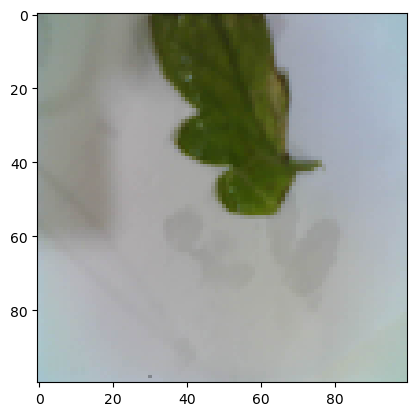

Prediction: Tomato___diseased
Image sucessfully Downloaded:  1.png
1/1 [==============================] - 0s 206ms/step
[0.9385792  0.06142084]


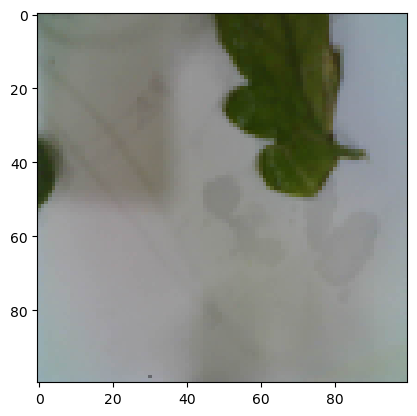

Prediction: Tomato___diseased
Image sucessfully Downloaded:  1.png
1/1 [==============================] - 0s 206ms/step
[0.9507229 0.0492772]


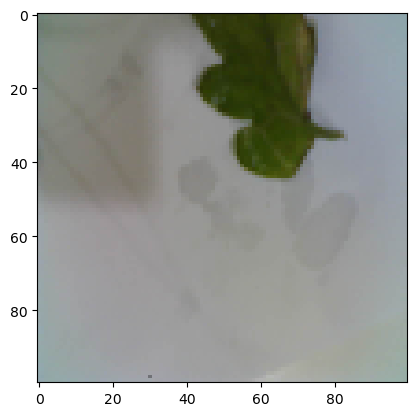

Prediction: Tomato___diseased
Image sucessfully Downloaded:  1.png
1/1 [==============================] - 0s 167ms/step
[0.75600743 0.24399255]


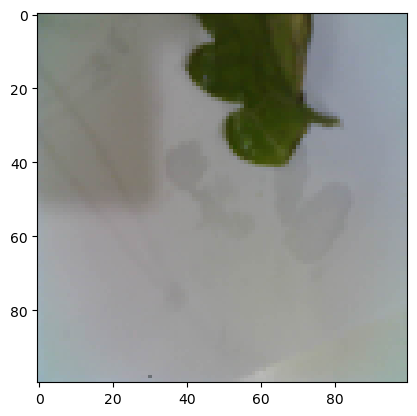

Prediction: Tomato___diseased
Image sucessfully Downloaded:  1.png
1/1 [==============================] - 0s 219ms/step
[0.7196938  0.28030625]


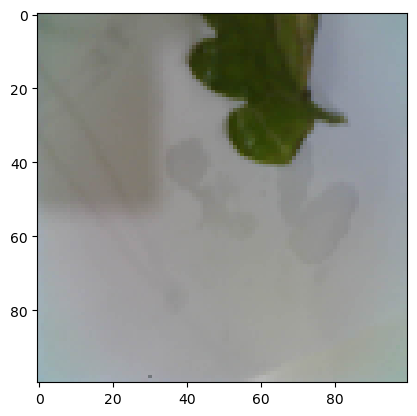

Prediction: Tomato___diseased
Image sucessfully Downloaded:  1.png
1/1 [==============================] - 0s 157ms/step
[0.865201   0.13479902]


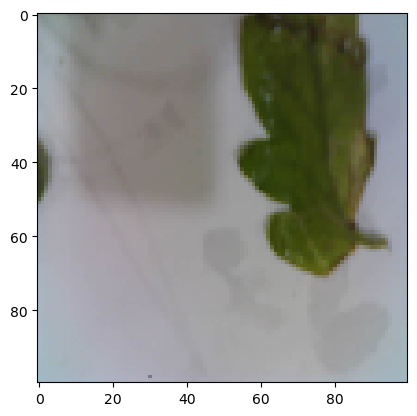

Prediction: Tomato___diseased


ConnectionError: HTTPConnectionPool(host='192.168.197.153', port=80): Max retries exceeded with url: /capture (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000020F639EE148>: Failed to establish a new connection: [WinError 10053] An established connection was aborted by the software in your host machine'))

In [23]:
count=0
while True:
    download()
    res=predict('1.png')
    f=open('output.txt','w')
    f.write(str(res))
    f.close()
    f=open('num.txt','w')
    f.write(str(count))
    f.close()
    count=count+1
    shutil.copy('1.png','C:/Users/TEJASWANI/Desktop/Drone_Disease_Web/web/'+str(count)+'.png')
    time.sleep(2)